In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import zipfile
import os


zip_path = '/content/drive/MyDrive/archive.zip'


extract_path = '/content/dataset'

print("Dosyalar çıkartılıyor... (Bu işlem 1-2 dk sürebilir)")

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Başarılı! Dosyalar çıkartıldı.")
else:
    print("❌ HATA: Zip dosyası bulunamadı! Lütfen dosya adının 'archive.zip' olduğundan emin ol.")

Dosyalar çıkartılıyor... (Bu işlem 1-2 dk sürebilir)
✅ Başarılı! Dosyalar çıkartıldı.


In [8]:
########################################
# Zeynep Emeç
# Base Model=Resnet50
# Advanced Model=Swin Transformer(Small/Base)

import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights, Swin_T_Weights
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# ------------ CİHAZ SEÇİMİ ------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Kullanılan cihaz:", device)

# ------------ DATA PATH ------------
train_dir = "/content/dataset/alziemer_dataset/train"
val_dir   = "/content/dataset/alziemer_dataset/val"
test_dir  = "/content/dataset/alziemer_dataset/test"

# ------------ TRANSFORM ------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

# ------------ BOZUK GÖRSELLERİ ATLAMA ------------
def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.verify()
        return True
    except Exception:
        print("⚠️ Bozuk/okunamayan görsel atlandı:", path)
        return False

# ------------ DATASET & DATALOADER ------------
train_dataset = datasets.ImageFolder(train_dir, transform=transform, is_valid_file=is_valid_image)
val_dataset   = datasets.ImageFolder(val_dir,   transform=transform, is_valid_file=is_valid_image)
test_dataset  = datasets.ImageFolder(test_dir,  transform=transform, is_valid_file=is_valid_image)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,  num_workers=0)
val_loader   = DataLoader(val_dataset,   batch_size=16, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_dataset,  batch_size=16, shuffle=False, num_workers=0)

print("Train görüntü sayısı:", len(train_dataset))
print("Val   görüntü sayısı:", len(val_dataset))
print("Test  görüntü sayısı:", len(test_dataset))
print("Sınıflar:", train_dataset.classes)

num_classes = len(train_dataset.classes)




Kullanılan cihaz: cuda
⚠️ Bozuk/okunamayan görsel atlandı: /content/dataset/alziemer_dataset/train/Moderate Dementia/Moderate Dementia_original_64.jpg
Train görüntü sayısı: 11199
Val   görüntü sayısı: 2400
Test  görüntü sayısı: 2400
Sınıflar: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


Kullanılan Cihaz: cuda

[1/3] ResNet50 (Base Model) Hazırlanıyor...
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 217MB/s]



>>> BAŞLATILIYOR: ResNet50_Base (Epochs: 10)
----------------------------------------
Epoch 1/10
  TRAIN Loss: 0.1481 Acc: 0.9445
  VAL Loss: 0.0103 Acc: 0.9988
Epoch 2/10
  TRAIN Loss: 0.0313 Acc: 0.9907
  VAL Loss: 0.0180 Acc: 0.9954
Epoch 3/10
  TRAIN Loss: 0.0345 Acc: 0.9893
  VAL Loss: 0.0021 Acc: 1.0000
Epoch 4/10
  TRAIN Loss: 0.0135 Acc: 0.9954
  VAL Loss: 0.0502 Acc: 0.9833
Epoch 5/10
  TRAIN Loss: 0.0242 Acc: 0.9928
  VAL Loss: 0.0043 Acc: 0.9992
Epoch 6/10
  TRAIN Loss: 0.0123 Acc: 0.9963
  VAL Loss: 0.0063 Acc: 0.9992
Epoch 7/10
  TRAIN Loss: 0.0053 Acc: 0.9986
  VAL Loss: 0.0001 Acc: 1.0000
Epoch 8/10
  TRAIN Loss: 0.0178 Acc: 0.9944
  VAL Loss: 0.0107 Acc: 0.9958
Epoch 9/10
  TRAIN Loss: 0.0058 Acc: 0.9981
  VAL Loss: 0.0123 Acc: 0.9954
Epoch 10/10
  TRAIN Loss: 0.0196 Acc: 0.9935
  VAL Loss: 0.0007 Acc: 1.0000

ResNet50_Base tamamlandı: 23m 4s
Best Val Acc: 1.0000

[2/3] Swin Transformer (Advanced Model) Hazırlanıyor...
Downloading: "https://download.pytorch.org/models/

100%|██████████| 108M/108M [00:00<00:00, 154MB/s]



>>> BAŞLATILIYOR: Swin_Transformer_Advanced (Epochs: 10)
----------------------------------------
Epoch 1/10
  TRAIN Loss: 0.3125 Acc: 0.8777
  VAL Loss: 0.0400 Acc: 0.9838
Epoch 2/10
  TRAIN Loss: 0.0613 Acc: 0.9799
  VAL Loss: 0.0015 Acc: 1.0000
Epoch 3/10
  TRAIN Loss: 0.0323 Acc: 0.9907
  VAL Loss: 0.0052 Acc: 0.9979
Epoch 4/10
  TRAIN Loss: 0.0073 Acc: 0.9983
  VAL Loss: 0.0004 Acc: 1.0000
Epoch 5/10
  TRAIN Loss: 0.0047 Acc: 0.9987
  VAL Loss: 0.0006 Acc: 1.0000
Epoch 6/10
  TRAIN Loss: 0.0028 Acc: 0.9995
  VAL Loss: 0.0001 Acc: 1.0000
Epoch 7/10
  TRAIN Loss: 0.0032 Acc: 0.9992
  VAL Loss: 0.0002 Acc: 1.0000
Epoch 8/10
  TRAIN Loss: 0.0026 Acc: 0.9993
  VAL Loss: 0.0002 Acc: 1.0000
Epoch 9/10
  TRAIN Loss: 0.0035 Acc: 0.9990
  VAL Loss: 0.0002 Acc: 1.0000
Epoch 10/10
  TRAIN Loss: 0.0029 Acc: 0.9994
  VAL Loss: 0.0001 Acc: 1.0000

Swin_Transformer_Advanced tamamlandı: 29m 10s
Best Val Acc: 1.0000

[3/3] Grafikler Çiziliyor...


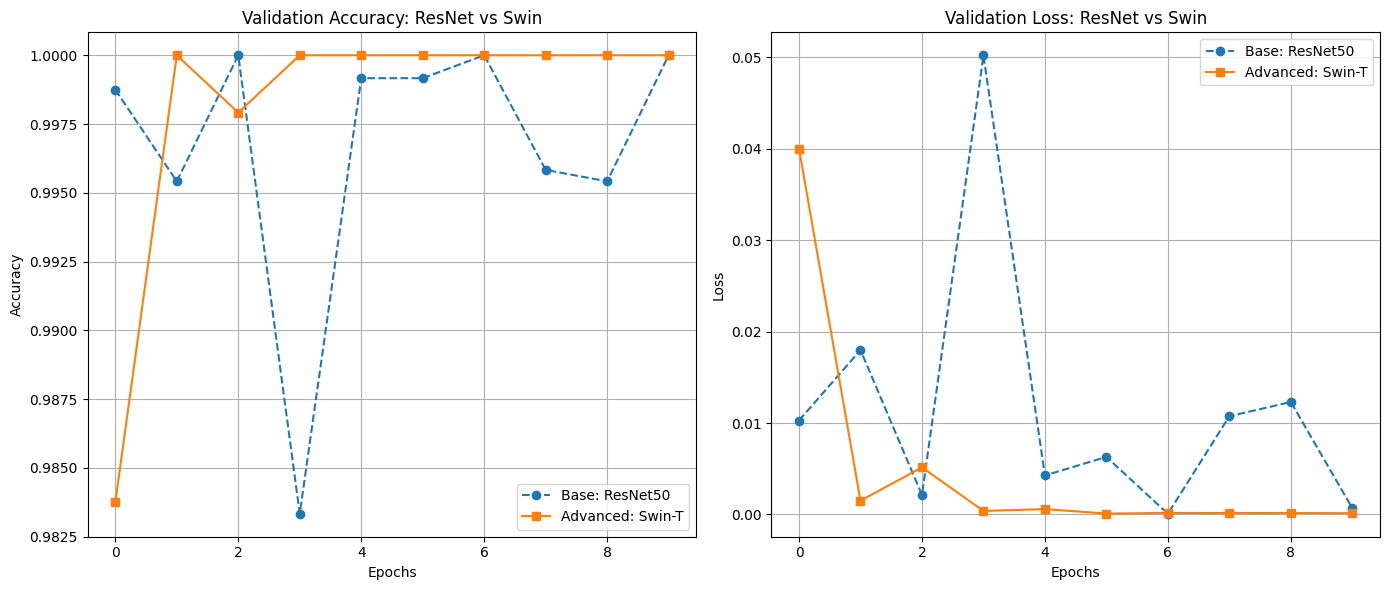


İŞLEM TAMAMLANDI! Grafikler kaydedildi.


In [9]:
import time
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import resnet50, ResNet50_Weights, swin_t, Swin_T_Weights

# 1. CİHAZ AYARI
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan Cihaz: {device}")

# ==========================================
# 2. EĞİTİM FONKSİYONU
# ==========================================
history_dict = {}

def train_model_full(model, model_name, criterion, optimizer, scheduler=None, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_loss_history, val_loss_history = [], []
    train_acc_history, val_acc_history = [], []

    print(f"\n>>> BAŞLATILIYOR: {model_name} (Epochs: {num_epochs})")
    print("-" * 40)

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader # İlk hücreden gelmeli
            else:
                model.eval()
                dataloader = val_loader   # İlk hücreden gelmeli

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train' and scheduler:
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'  {phase.upper()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc.item())

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), f"{model_name}_final_best.pth")

    time_elapsed = time.time() - since
    print(f'\n{model_name} tamamlandı: {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best Val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    history_dict[model_name] = {
        'train_loss': train_loss_history, 'val_loss': val_loss_history,
        'train_acc': train_acc_history, 'val_acc': val_acc_history
    }
    return model

criterion = nn.CrossEntropyLoss()

# ==========================================
# 3. BASE MODEL: ResNet50
# ==========================================
print("\n[1/3] ResNet50 (Base Model) Hazırlanıyor...")


weights_res = ResNet50_Weights.IMAGENET1K_V1
resnet = resnet50(weights=weights_res)


num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 4)
resnet = resnet.to(device)


optimizer_res = torch.optim.Adam(resnet.parameters(), lr=1e-4)


resnet = train_model_full(
    resnet, "ResNet50_Base", criterion, optimizer_res, num_epochs=10
)

# ==========================================
# 4. ADVANCED MODEL: Swin Transformer
# ==========================================
print("\n[2/3] Swin Transformer (Advanced Model) Hazırlanıyor...")

# Pre-trained ağırlıklar
weights_swin = Swin_T_Weights.IMAGENET1K_V1
swin = swin_t(weights=weights_swin)

# Son katmanı (head)
num_ftrs_swin = swin.head.in_features
swin.head = nn.Linear(num_ftrs_swin, 4)
swin = swin.to(device)


optimizer_swin = torch.optim.AdamW(swin.parameters(), lr=5e-5)
scheduler_swin = torch.optim.lr_scheduler.StepLR(optimizer_swin, step_size=3, gamma=0.1)


swin = train_model_full(
    swin, "Swin_Transformer_Advanced", criterion, optimizer_swin,
    scheduler=scheduler_swin, num_epochs=10
)

# ==========================================
# 5. KARŞILAŞTIRMA GRAFİKLERİ
# ==========================================
print("\n[3/3] Grafikler Çiziliyor...")
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dict['ResNet50_Base']['val_acc'], label='Base: ResNet50', marker='o', linestyle='--')
plt.plot(history_dict['Swin_Transformer_Advanced']['val_acc'], label='Advanced: Swin-T', marker='s')
plt.title('Validation Accuracy: ResNet vs Swin')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['ResNet50_Base']['val_loss'], label='Base: ResNet50', marker='o', linestyle='--')
plt.plot(history_dict['Swin_Transformer_Advanced']['val_loss'], label='Advanced: Swin-T', marker='s')
plt.title('Validation Loss: ResNet vs Swin')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plt.tight_layout()
plt.savefig("Member2_Zeynep_Comparison.png")
plt.show()

print("\nİŞLEM TAMAMLANDI! Grafikler kaydedildi.")